In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
Gas=pd.read_csv("Gas_turbines.csv")
Gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
Gas1= Gas.copy() 
Gas1 = Gas1.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
Gas1.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [4]:
Gas1.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [5]:
#Defining X&Y
X =Gas1.iloc[:,:-1]
Y = Gas1.iloc[:,-1]

In [6]:
#Splitting data into testing & training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [7]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [8]:
#scaling each feature to a specific range i.e 0 to 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [9]:
len(X_train)

10527

# Model

In [10]:
# create model
model = Sequential()
model.add(Dense(200, input_dim=3, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

In [11]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [12]:
# Fit the model
hist1 = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 4s 33ms/step - loss: 0.0695 - mse: 0.0695 - mae: 0.2033 - val_loss: 0.0434 - val_mse: 0.0434 - val_mae: 0.1594
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0444 - mse: 0.0444 - mae: 0.1646 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1590
Epoch 3/100
48/48 [==============================] - 1s 25ms/step - loss: 0.0435 - mse: 0.0435 - mae: 0.1640 - val_loss: 0.0405 - val_mse: 0.0405 - val_mae: 0.1579
Epoch 4/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0424 - mse: 0.0424 - mae: 0.1625 - val_loss: 0.0398 - val_mse: 0.0398 - val_mae: 0.1556
Epoch 5/100
48/48 [==============================] - 1s 20ms/step - loss: 0.0414 - mse: 0.0414 - mae: 0.1609 - val_loss: 0.0391 - val_mse: 0.0391 - val_mae: 0.1552
Epoch 6/100
48/48 [==============================] - 1s 16ms/step - loss: 0.0418 - mse: 0.0418 - mae: 0.1624 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1563
Epoch 7/100
48/4

Epoch 51/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0401 - mse: 0.0401 - mae: 0.1584 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1523
Epoch 52/100
48/48 [==============================] - 1s 17ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1562 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae: 0.1522
Epoch 53/100
48/48 [==============================] - 1s 25ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1556 - val_loss: 0.0400 - val_mse: 0.0400 - val_mae: 0.1569
Epoch 54/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1593 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1528
Epoch 55/100
48/48 [==============================] - 1s 26ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1566 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1536
Epoch 56/100
48/48 [==============================] - 1s 27ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1580 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae: 0.1513
Epoch 57/1

# Visualizing training history

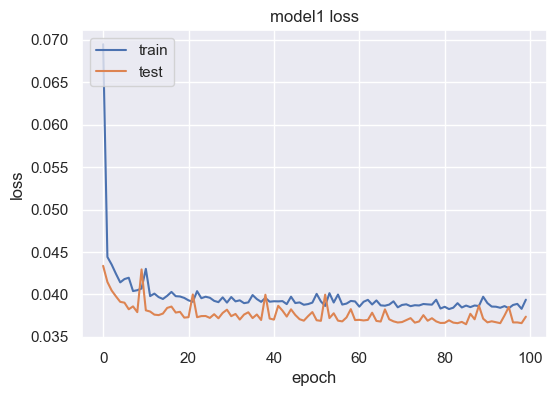

In [14]:
# summarize history for Loss
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion

In [ ]:
#Training history plotting was done for the above model.
#It is understood that Neural Networks is not a good methodology for this regression problem.